<a href="https://colab.research.google.com/github/Ayush-Sharma410/Parkinsons-Detection/blob/main/Parkinsons_CNN_with_XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing and Importing required libraries

In [37]:
!pip install xgboost
!pip install catboost


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached catboost-1.2.5-cp312-cp312-win_amd64.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached plotly-5.22.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached tenacity-8.4.2-py3-none-any.whl.metadata (1.2 kB)
Using cached catboost-1.2.5-cp312-cp312-win_amd64.whl (101.1 MB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
Using cached plotly-5.22.0-py3-none-any.whl (16.4 MB)
Using cached tenacity-8.4.2-py3-none-any.whl (28 kB)



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import CategoricalNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, make_scorer, roc_auc_score, auc, roc_curve
from sklearn.calibration import calibration_curve
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [39]:
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
#from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'keras'

# Data Collection and Preprocessing

In [ ]:
import pandas as pd
df = pd.read_csv('Gait_Data___Arm_swing_02Apr2024.csv')
df = df.iloc[:,3:]
print(df.shape)
df = df.dropna(subset=['COHORT'])
df.columns

(192, 57)


Index(['COHORT', 'SP_U', 'RA_AMP_U', 'LA_AMP_U', 'RA_STD_U', 'LA_STD_U',
       'SYM_U', 'R_JERK_U', 'L_JERK_U', 'ASA_U', 'ASYM_IND_U', 'TRA_U',
       'T_AMP_U', 'CAD_U', 'STR_T_U', 'STR_CV_U', 'STEP_REG_U', 'STEP_SYM_U',
       'JERK_T_U', 'SP__DT', 'RA_AMP_DT', 'LA_AMP_DT', 'RA_STD_DT',
       'LA_STD_DT', 'SYM_DT', 'R_JERK_DT', 'L_JERK_DT', 'ASA_DT',
       'ASYM_IND_DT', 'TRA_DT', 'T_AMP_DT', 'CAD_DT', 'STR_T_DT', 'STR_CV_DT',
       'STEP_REG_DT', 'STEP_SYM_DT', 'JERK_T_DT', 'SW_VEL_OP', 'SW_PATH_OP',
       'SW_FREQ_OP', 'SW_JERK_OP', 'SW_VEL_CL', 'SW_PATH_CL', 'SW_FREQ_CL',
       'SW_JERK_CL', 'TUG1_DUR', 'TUG1_STEP_NUM', 'TUG1_STRAIGHT_DUR',
       'TUG1_TURNS_DUR', 'TUG1_STEP_REG', 'TUG1_STEP_SYM', 'TUG2_DUR',
       'TUG2_STEP_NUM', 'TUG2_STRAIGHT_DUR', 'TUG2_TURNS_DUR', 'TUG2_STEP_REG',
       'TUG2_STEP_SYM'],
      dtype='object')

## Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 184
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   COHORT             167 non-null    float64
 1   SP_U               161 non-null    float64
 2   RA_AMP_U           158 non-null    float64
 3   LA_AMP_U           158 non-null    float64
 4   RA_STD_U           158 non-null    float64
 5   LA_STD_U           158 non-null    float64
 6   SYM_U              158 non-null    float64
 7   R_JERK_U           158 non-null    float64
 8   L_JERK_U           158 non-null    float64
 9   ASA_U              158 non-null    float64
 10  ASYM_IND_U         158 non-null    float64
 11  TRA_U              158 non-null    float64
 12  T_AMP_U            158 non-null    float64
 13  CAD_U              158 non-null    float64
 14  STR_T_U            158 non-null    float64
 15  STR_CV_U           158 non-null    float64
 16  STEP_REG_U         158 non-null

## Statistical Details of the data

In [ ]:
df.describe()

,COHORT,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,R_JERK_U,L_JERK_U,ASA_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
count,167.000000,161.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,...,165.000000,165.000000,165.000000,165.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,2.113772,1.139733,29.509253,32.089553,4.520293,4.524772,0.625568,0.022556,0.026031,15.274166,...,1.810985,1.827983,0.551866,1.382831,11.379648,12.322003,2.006230,1.808940,0.555609,1.242455
std,0.996495,0.181094,15.668447,17.131813,2.495072,2.651965,0.816483,0.040797,0.062861,10.461813,...,2.704029,0.429213,0.135838,1.112579,2.823247,4.464896,3.194280,0.458783,0.122180,0.420310
min,1.000000,0.647000,2.764410,3.838619,1.345954,1.454332,0.019062,0.000872,0.001000,0.612344,...,0.390625,1.050781,0.099709,0.246550,5.796875,5.167969,0.421875,1.003906,0.087907,0.340885
25%,1.000000,1.010000,16.936987,20.516996,2.744923,2.789085,0.210539,0.003539,0.005386,7.108170,...,0.531250,1.484375,0.477543,1.024723,9.468750,9.974365,0.523438,1.473633,0.491053,1.016458
50%,3.000000,1.143000,27.645618,31.319428,3.965688,3.725086,0.366426,0.008174,0.009433,12.374442,...,0.585938,1.777344,0.570403,1.201709,11.042969,12.009766,0.578125,1.738281,0.562975,1.137552
75%,3.000000,1.266000,40.690346,41.772602,5.859928,5.581406,0.660475,0.024252,0.021181,22.153112,...,0.640625,2.117188,0.658801,1.439347,12.406250,13.786377,0.640625,2.093750,0.642239,1.351135
max,3.000000,1.618000,78.376934,79.697780,18.543469,18.263038,5.164517,0.264852,0.644772,43.065015,...,11.710938,3.027344,0.831344,13.390026,23.171875,34.654297,14.242188,3.492188,0.798386,3.334641


## Checking for missing values in the data

In [ ]:
df.isnull().sum()

COHORT                0
SP_U                  6
RA_AMP_U              9
LA_AMP_U              9
RA_STD_U              9
LA_STD_U              9
SYM_U                 9
R_JERK_U              9
L_JERK_U              9
ASA_U                 9
ASYM_IND_U            9
TRA_U                 9
T_AMP_U               9
CAD_U                 9
STR_T_U               9
STR_CV_U              9
STEP_REG_U            9
STEP_SYM_U            9
JERK_T_U              9
SP__DT               10
RA_AMP_DT            15
LA_AMP_DT            15
RA_STD_DT            15
LA_STD_DT            15
SYM_DT               15
R_JERK_DT            15
L_JERK_DT            15
ASA_DT               15
ASYM_IND_DT          15
TRA_DT               15
T_AMP_DT             15
CAD_DT               15
STR_T_DT             15
STR_CV_DT            15
STEP_REG_DT          15
STEP_SYM_DT          15
JERK_T_DT            15
SW_VEL_OP             8
SW_PATH_OP            8
SW_FREQ_OP            8
SW_JERK_OP            8
SW_VEL_CL       

## Data Visualization

### Histograms

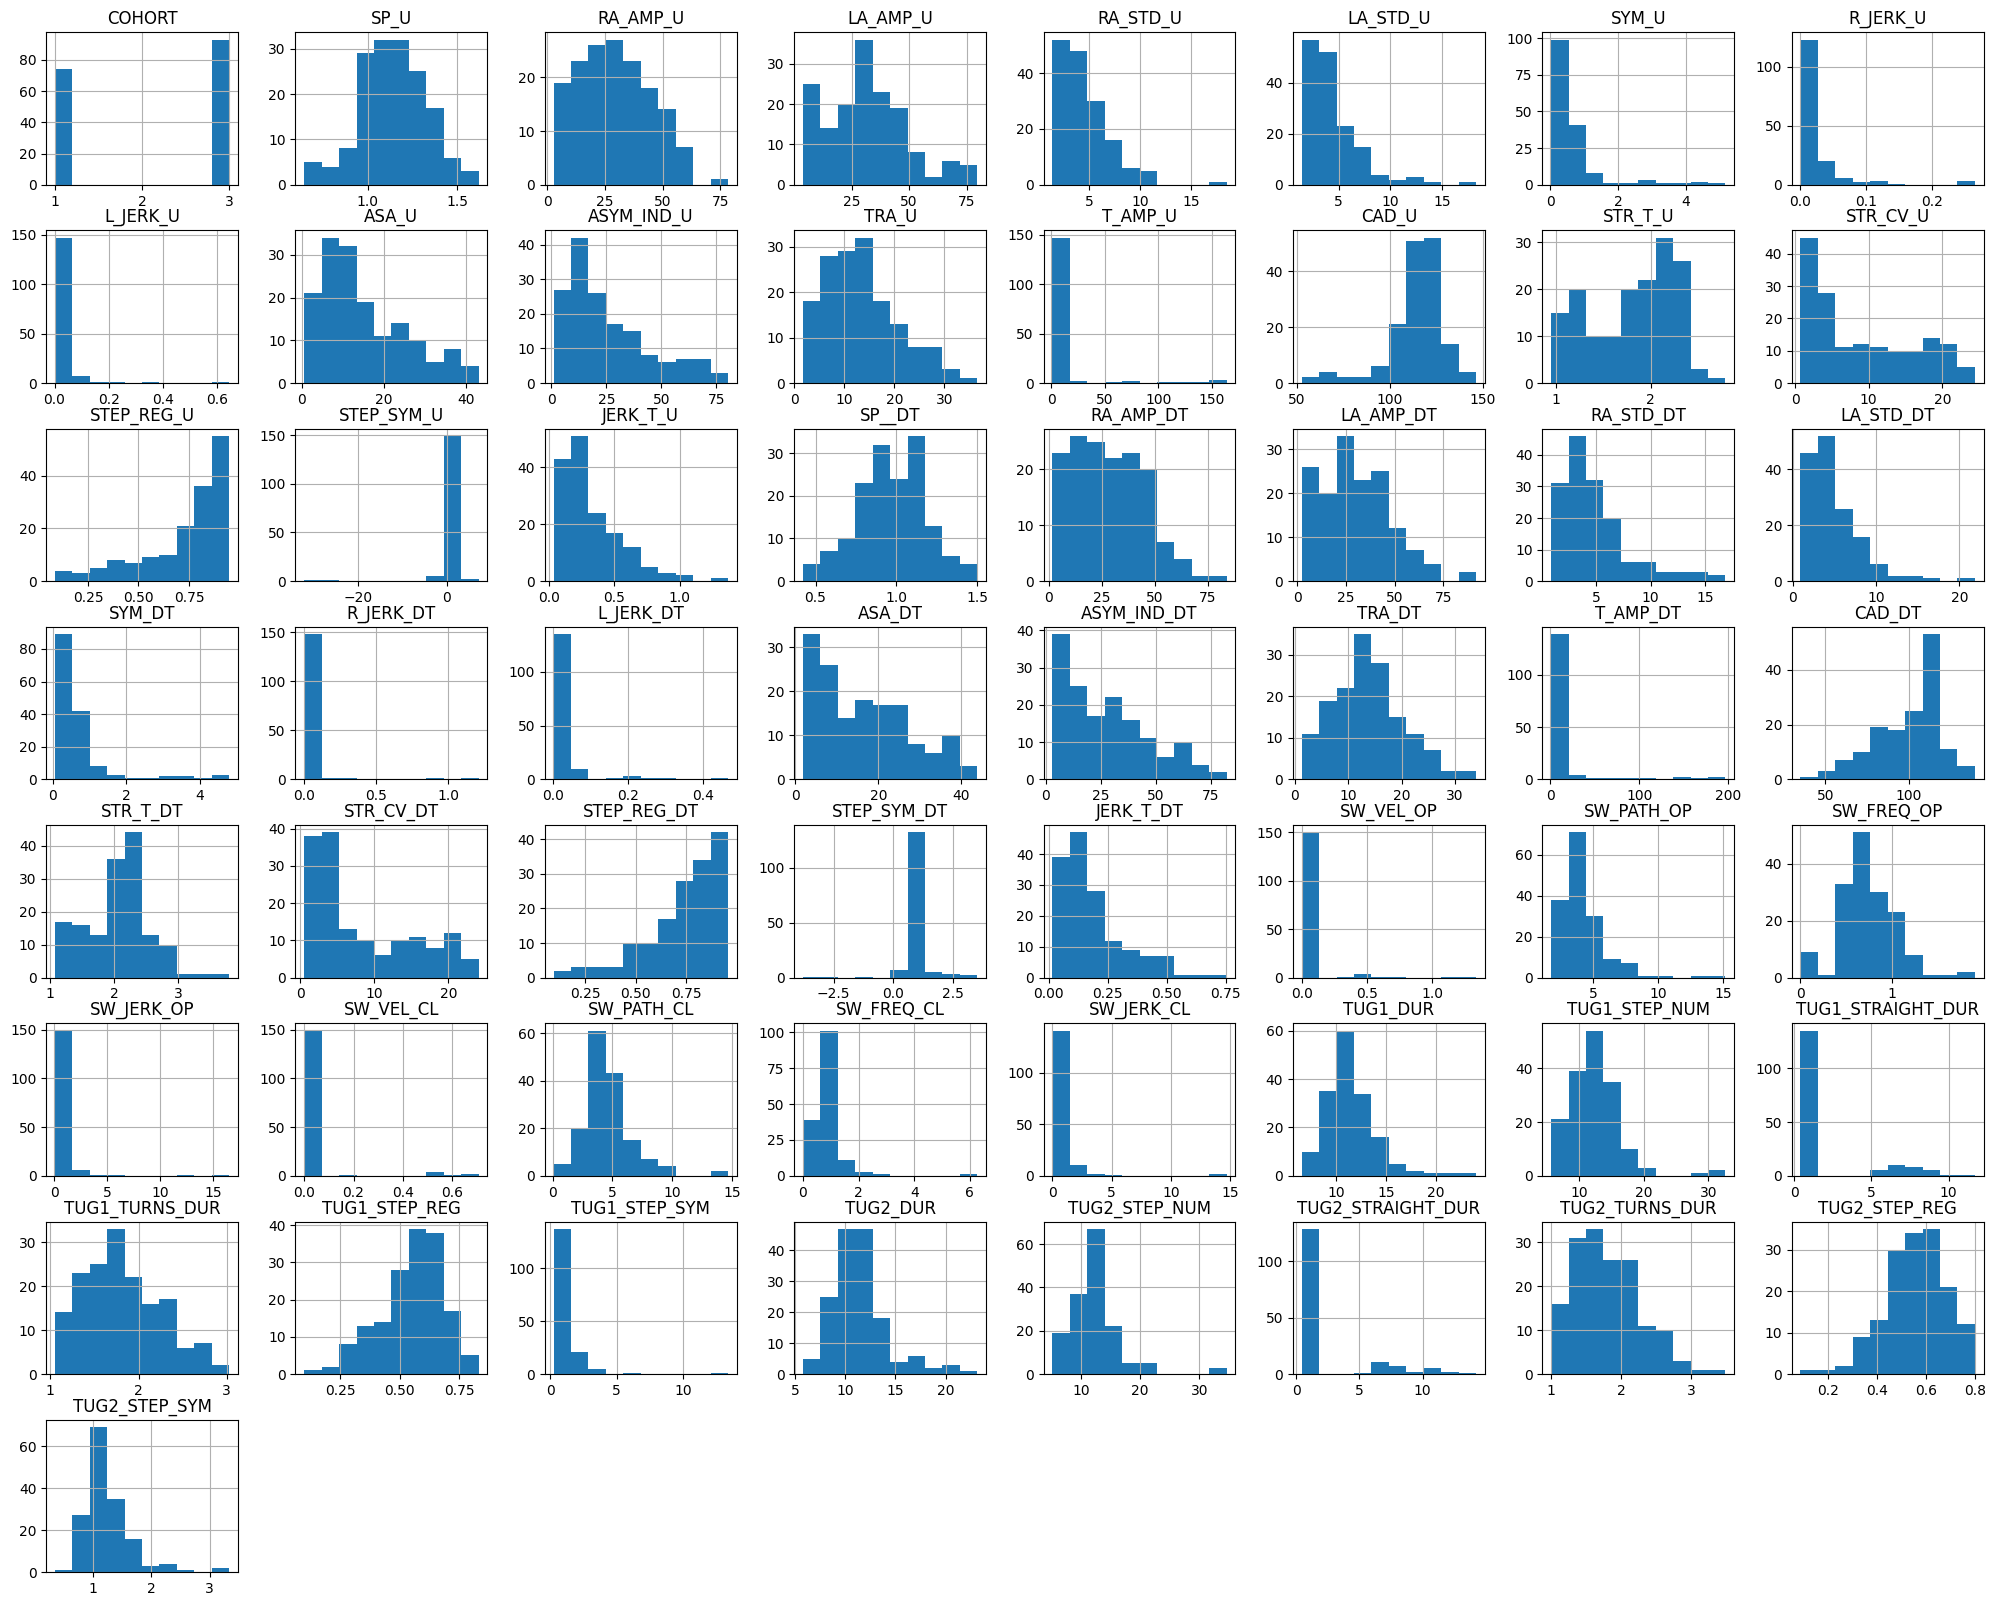

In [ ]:
_ = df.hist(figsize=(25,20))

### Plotting Correlation matrix

<Axes: >

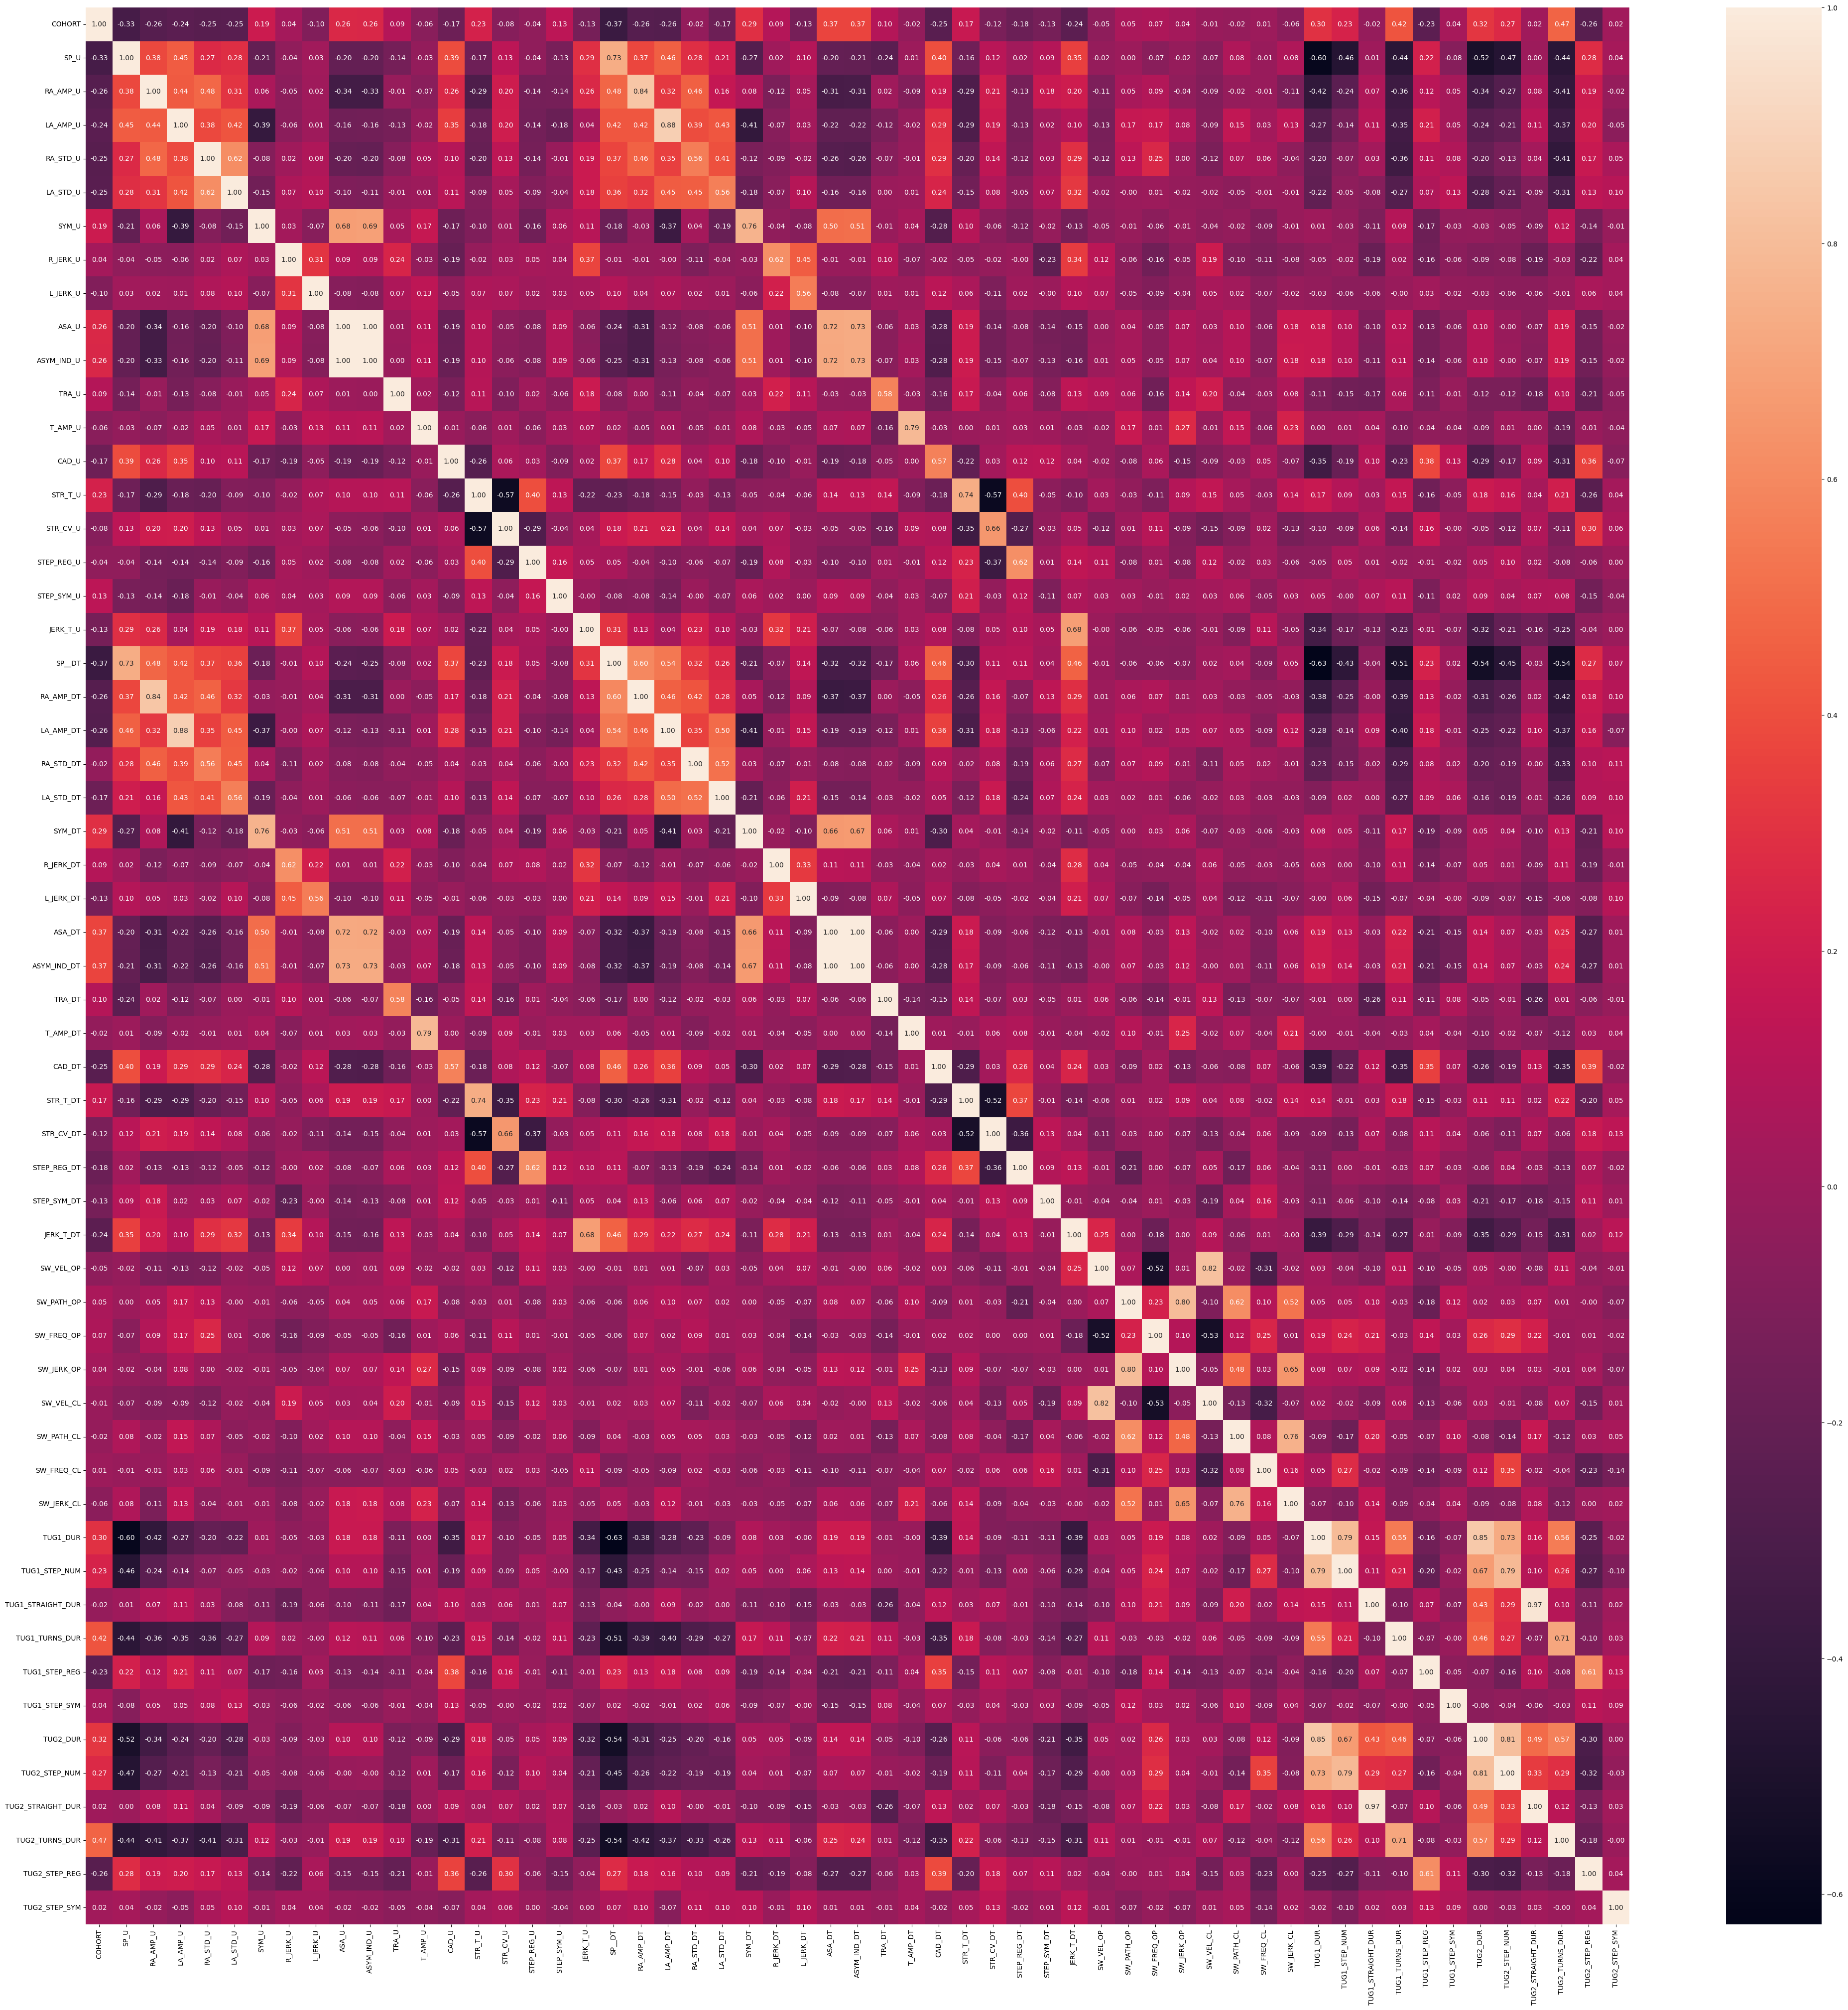

In [ ]:
fig1 = plt.figure(figsize=(50,50))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

### Label Encoding

In [ ]:
df['COHORT'].value_counts()

COHORT
3.0    93
1.0    74
Name: count, dtype: int64

In [ ]:
df.COHORT = df.COHORT.replace({1.0:0, 3.0:1})

In [ ]:
df.head()

,COHORT,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,R_JERK_U,L_JERK_U,ASA_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,0.0,1.445,42.787289,31.405978,2.783204,2.597315,0.369588,0.001618,0.002542,9.754631,...,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,0.0,1.211,41.744432,42.194299,2.286481,2.235276,0.019062,0.002209,0.003016,0.612344,...,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,1.0,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,0.002742,0.008316,10.824114,...,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,0.0,1.395,47.294965,34.610918,7.725009,7.838284,0.375873,0.003395,0.005928,9.854201,...,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
4,0.0,0.982,51.516231,30.989870,7.412588,4.762775,0.672047,0.049690,0.059845,15.409553,...,0.632812,1.710938,0.509044,1.909214,8.609375,7.441406,0.640625,1.449219,0.667530,1.035053


# Splitting into Data and Target

In [ ]:
x = df.drop('COHORT', axis=1)
x.fillna(x.mean(), inplace=True)
y = df['COHORT']

In [ ]:
x.head()

,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,R_JERK_U,L_JERK_U,ASA_U,ASYM_IND_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,1.445,42.787289,31.405978,2.783204,2.597315,0.369588,0.001618,0.002542,9.754631,15.460948,...,0.554688,1.625000,0.612586,1.421568,10.390625,12.291016,0.546875,1.523438,0.565465,1.056312
1,1.211,41.744432,42.194299,2.286481,2.235276,0.019062,0.002209,0.003016,0.612344,0.961927,...,0.507812,1.312500,0.605626,1.284985,9.437500,11.674805,0.523438,1.441406,0.744995,1.209420
2,1.131,30.357805,42.788477,5.422287,5.012269,0.289054,0.002742,0.008316,10.824114,17.230208,...,0.593750,2.152344,0.741461,0.993754,13.781250,16.245117,0.554688,2.363281,0.713150,1.002639
3,1.395,47.294965,34.610918,7.725009,7.838284,0.375873,0.003395,0.005928,9.854201,15.628248,...,0.632812,1.804688,0.575304,1.137755,8.820312,8.132812,0.593750,1.500000,0.548270,3.290938
4,0.982,51.516231,30.989870,7.412588,4.762775,0.672047,0.049690,0.059845,15.409553,24.756537,...,0.632812,1.710938,0.509044,1.909214,8.609375,7.441406,0.640625,1.449219,0.667530,1.035053


In [ ]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: COHORT, dtype: float64

## Scaling the Data

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled.head()

,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,R_JERK_U,L_JERK_U,ASA_U,ASYM_IND_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,0.821833,0.529315,0.363402,0.083573,0.068000,0.068123,0.002826,0.002395,0.215352,0.182782,...,0.014493,0.290514,0.701001,0.089399,0.264388,0.241571,0.009045,0.208791,0.672163,0.238973
1,0.580844,0.515523,0.505617,0.054690,0.046461,0.000000,0.005064,0.003132,0.000000,0.000000,...,0.010352,0.132411,0.691487,0.079008,0.209532,0.220673,0.007349,0.175824,0.924852,0.290116
2,0.498455,0.364932,0.513450,0.237030,0.211672,0.052472,0.007083,0.011364,0.240545,0.205087,...,0.017943,0.557312,0.877147,0.056850,0.459532,0.375671,0.009610,0.546311,0.880031,0.221045
3,0.770340,0.588931,0.405650,0.370929,0.379800,0.069345,0.009557,0.007655,0.217698,0.184891,...,0.021394,0.381423,0.650043,0.067806,0.174011,0.100550,0.012436,0.199372,0.647961,0.985402
4,0.345005,0.644759,0.357917,0.352762,0.196829,0.126905,0.184931,0.091407,0.348558,0.299968,...,0.021394,0.333992,0.559479,0.126501,0.161871,0.077101,0.015828,0.178964,0.815819,0.231872


# Splitting into Training and Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 56), (34, 56), (133,), (34,))

In [ ]:
X_train.head()

,SP_U,RA_AMP_U,LA_AMP_U,RA_STD_U,LA_STD_U,SYM_U,R_JERK_U,L_JERK_U,ASA_U,ASYM_IND_U,...,TUG1_STRAIGHT_DUR,TUG1_TURNS_DUR,TUG1_STEP_REG,TUG1_STEP_SYM,TUG2_DUR,TUG2_STEP_NUM,TUG2_STRAIGHT_DUR,TUG2_TURNS_DUR,TUG2_STEP_REG,TUG2_STEP_SYM
0,0.349125,0.286934,0.346420,0.068364,0.098147,0.040301,0.035541,0.009412,0.186348,0.159794,...,0.008972,0.634387,0.657237,0.123272,0.336781,0.293171,0.005653,0.425432,0.856755,0.257887
1,0.532441,0.186280,0.365125,0.005101,0.042562,0.086950,0.037721,0.019832,0.430300,0.374176,...,0.018634,0.567194,0.632835,0.039600,0.142986,0.091343,0.008479,0.277865,0.682238,0.188745
2,0.637487,0.117245,0.337734,0.117413,0.083822,0.113743,1.000000,0.308254,0.598938,0.534972,...,0.022084,0.395257,0.260014,0.039142,0.301259,0.205339,0.011871,0.329670,0.281208,0.354413
3,0.469619,0.792946,0.713504,0.221500,0.127084,0.012398,0.026823,0.010067,0.044557,0.037503,...,0.593513,0.175889,0.505281,0.034452,0.377698,0.250845,0.488977,0.353218,0.538727,0.102736
4,0.510814,0.470164,0.387686,0.361386,0.397066,0.029067,0.303849,0.160760,0.099663,0.084084,...,0.020704,0.195652,0.385682,0.037360,0.101619,0.030602,0.013567,0.106750,0.568381,0.131032


# Building and Training ML Classification models

### Naive Bayes

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
acc_nb = accuracy_score(gnb.predict(X_test), y_test)
rec_nb = recall_score(gnb.predict(X_test), y_test)
prec_nb = precision_score(gnb.predict(X_test), y_test)
print('Accuracy on Testing Set: {:.2f}'.format(acc_nb))
print('Recall on Testing Set: {:.2f}'.format(rec_nb))
print('Precision on Testing Set: {:.2f}'.format(prec_nb))

NameError: name 'accuracy_score' is not defined

In [ ]:
print(classification_report(y_test, gnb.predict(X_test)))

NameError: name 'classification_report' is not defined

### XGBoost Classifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train.values, y_train.values)

NameError: name 'X_train' is not defined

In [ ]:
acc_train = accuracy_score(xgb.predict(X_train.values), y_train.values)
print('Accuracy on Training Set: ', acc_train)

NameError: name 'accuracy_score' is not defined

In [ ]:
acc_x = accuracy_score(xgb.predict(X_test.values), y_test.values)
rec_x = recall_score(xgb.predict(X_test.values), y_test.values)
prec_x = precision_score(xgb.predict(X_test.values), y_test.values)
print('Accuracy on Testing Set: {:.2f}'.format(acc_x))
print('Recall on Testing Set: {:.2f}'.format(rec_x))
print('Precision on Testing Set: {:.2f}'.format(prec_x))

NameError: name 'accuracy_score' is not defined

In [ ]:
print(classification_report(y_test.values, xgb.predict(X_test.values)))

NameError: name 'classification_report' is not defined

### Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
acc_train = accuracy_score(rfc.predict(X_train), y_train)
print('Accuracy on Training Set: ', acc_train)

NameError: name 'accuracy_score' is not defined

In [ ]:
acc_r = accuracy_score(rfc.predict(X_test), y_test)
rec_r = recall_score(rfc.predict(X_test), y_test)
prec_r = precision_score(rfc.predict(X_test), y_test)
print('Accuracy on Testing Set: {:.2f}'.format(acc_r))
print('Recall on Testing Set: {:.2f}'.format(rec_r))
print('Precision on Testing Set: {:.2f}'.format(prec_r))

NameError: name 'accuracy_score' is not defined

In [ ]:
report = classification_report(y_test, rfc.predict(X_test))
print(report)

NameError: name 'classification_report' is not defined

### CatBoost Classifier

In [ ]:
clf = CatBoostClassifier(
    iterations=10,
    learning_rate=0.001,
    verbose=0)

NameError: name 'CatBoostClassifier' is not defined

In [ ]:
clf.fit(X_train, y_train)

NameError: name 'clf' is not defined

In [ ]:
acc_c = accuracy_score(clf.predict(X_test), y_test)
rec_c = recall_score(clf.predict(X_test), y_test)
prec_c = precision_score(clf.predict(X_test), y_test)
print('Accuracy on Testing Set: {:.2f}'.format(acc_c))
print('Recall on Testing Set: {:.2f}'.format(rec_c))
print('Precision on Testing Set: {:.2f}'.format(prec_c))

NameError: name 'accuracy_score' is not defined

In [ ]:
accuracies = [acc_nb, acc_x, acc_r,acc_c]

In [ ]:
accuracies

[0.7352941176470589,
 0.7647058823529411,
 0.7941176470588235,
 0.7352941176470589]

# ConvXGB - CNN with XGBoost

### Checking if the datset is balanced


In [ ]:
df = df.sort_values(by='COHORT')
print(df.shape)
df

NameError: name 'df' is not defined

In [ ]:
freqs = df['COHORT'].value_counts()
freqs

NameError: name 'df' is not defined

###  Reshaping Training and Testing Sets for CNN

In [ ]:
X_train_cnn = np.array(X_train).reshape(-1, 2, 28, 1)
X_test_cnn = np.array(X_test).reshape(-1, 2, 28, 1)
y_train = np.array(y_train)
y_test = np.array(y_test)

NameError: name 'X_train' is not defined

### CNN model

In [ ]:
model_cnn = Sequential()
K.set_image_data_format('channels_last')
model_cnn.add(Conv2D(64,3,3, padding='same', input_shape=(2,28,1),activation='relu',name = 'convo_2d_1'))
# model_cnn.add(MaxPooling2D(pool_size=(1,1),padding='same',name = 'maxpool_1'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Conv2D(64, 3, 3, activation= 'relu',padding='same' ,name = 'convo_2d_2'))
# model_cnn.add(MaxPooling2D(pool_size=(1,1),padding='same',name = 'maxpool_2'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Conv2D(32, 5, 5, activation= 'relu',padding='same' ,name = 'convo_2d_3'))
model_cnn.add(Dropout(0.5))
# model_cnn.add(Conv2D(32, 5, 5, activation= 'relu',padding='same' ,name = 'convo_2d_4'))
# model_cnn.add(Dropout(0.5))
model_cnn.add(Flatten(name = 'flatten'))
model_cnn.add(Dense(128, activation= 'relu',name = 'dense_layer1' ))
model_cnn.add(Dense(64, activation= 'relu',name = 'dense_layer_2' ))
model_cnn.add(Dense(1, activation= 'sigmoid' ))
model_cnn.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

NameError: name 'Sequential' is not defined

## Model Summary

In [ ]:
model_cnn.summary()

NameError: name 'model_cnn' is not defined

## Training the CNN Model

In [ ]:
import tensorflow as tf
checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from tensorflow.keras.callbacks import Callback

class StopAtAccuracy(Callback):
    def __init__(self, accuracy=0.8):
        super(StopAtAccuracy, self).__init__()
        self.accuracy = accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= self.accuracy:
            print(f"\nReached {self.accuracy*100}% validation accuracy, stopping training!")
            self.model.stop_training = True
stop_at_accuracy_callback = StopAtAccuracy(accuracy=0.91)


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
history = model_cnn.fit(
    X_train_cnn, y_train,
    epochs=200,
    batch_size=120,
    validation_data=(X_test_cnn, y_test),
    shuffle=True,
    callbacks=[model_checkpoint_callback, stop_at_accuracy_callback]
)


NameError: name 'model_cnn' is not defined

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [ ]:
loss_df = pd.DataFrame({'Epoch': np.arange(0,200,1),
                        'TrainingLoss': history.history['loss'],
                        'ValidationLoss': history.history['val_loss']})

NameError: name 'history' is not defined

In [ ]:
loss_df.to_csv('LossDataFrame.csv')

NameError: name 'loss_df' is not defined

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [ ]:
accuracy_df =  pd.DataFrame({'Epoch': np.arange(0,200,1),
                             'TrainingAccuracy': history.history['accuracy'],
                             'ValidationAccuracy': history.history['val_accuracy']})

NameError: name 'history' is not defined

In [ ]:
accuracy_df.to_csv('AccuracyDataFrame.csv')

NameError: name 'accuracy_df' is not defined

In [ ]:
model_feat = Model(inputs = model_cnn.input, outputs=model_cnn.get_layer('convo_2d_3').output)

NameError: name 'Model' is not defined

In [ ]:
X_train.shape

NameError: name 'X_train' is not defined

In [ ]:
feat_train = model_feat.predict(X_train_cnn)
print(feat_train.shape)

NameError: name 'model_feat' is not defined

In [ ]:
feat_test = model_feat.predict(X_test_cnn)
print(feat_test.shape)

2/2 [==============================] - 0s 7ms/step
(34, 1, 1, 32)


## Combining with XGBoost

In [ ]:
xgb_cnn = XGBClassifier(learning_rate=0.01, n_estimators=100,max_depth=6)
xgb_cnn.fit(feat_train.reshape(feat_train.shape[0], -1), y_train)
xgb_cnn.score(feat_test.reshape(feat_test.shape[0], -1), y_test)

0.7058823529411765

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(feat_train.reshape(feat_train.shape[0], -1), y_train)
rfc.score(feat_test.reshape(feat_test.shape[0], -1),y_test)

0.7058823529411765

In [ ]:
clf = CatBoostClassifier(
    iterations=100,
    learning_rate=0.01,
    verbose=0)

In [ ]:
clf.fit(feat_train.reshape(feat_train.shape[0], -1), y_train)
clf.score(feat_test.reshape(feat_test.shape[0], -1), y_test)

0.8235294117647058

In [ ]:
from lightgbm import LGBMClassifier
lgm = LGBMClassifier(min_data_in_leaf=200,verbose = 0)
lgbm = lgm.fit(feat_train.reshape(feat_train.shape[0], -1), y_train)
lgbm.score(feat_test.reshape(feat_test.shape[0], -1), y_test)

[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Wa

0.5588235294117647

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming xgb_cnn, clf, and rfc are already trained models and feat_test is the test dataset

# Obtain predictions from each model
xgb_cnn_pred = xgb_cnn.predict(feat_test.reshape(feat_test.shape[0], -1))
clf_pred = clf.predict(feat_test.reshape(feat_test.shape[0], -1))
rfc_pred = rfc.predict(feat_test.reshape(feat_test.shape[0], -1))

# Ensure predictions are integer class labels
xgb_cnn_pred = xgb_cnn_pred.astype(int)
clf_pred = clf_pred.astype(int)
rfc_pred = rfc_pred.astype(int)

# Stack the predictions
preds = np.vstack((xgb_cnn_pred, clf_pred, rfc_pred)).T

# Ensemble Voting
ensemble_pred = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=preds)

# Evaluation
accuracy = accuracy_score(y_test, ensemble_pred)
print(f'Ensemble Model Accuracy: {accuracy:.2f}')


Ensemble Model Accuracy: 0.71
